# Unemployment Analysis with Python

### Problem Statement

<p>Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. There have been a sharp increase in the unemployment rate during the COVID-19. This project will be analyzing the unemployment rate.
</p>

### Data

<p>
This dataset provides information on the unemployment rate in India during the COVID-19. The original source data is gotten from Kaggle. The dataset can be downloaded
    <a href="https://www.canva.com/link?target=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fgokulrajkmv%2Funemployment-in-india&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document">HERE</a> </p>

#### Preparing the tools

The libraries used for this unemployment analysis include;
<ul>
    <li>numpy - for numerical operations</li>
    <li>pandas - for data analysis</li>
    <li>matplotlib/seaborn - for plotting and data visualization</li>
 </ul>

In [1]:
# import all the tools that will be needed

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
# To visualize the plottings inside the notebook
%matplotlib inline 

#### Load the data

In [2]:
# using the Id column as the index column
# number of columns will reduce from 6 to 5.
employ = pd.read_csv('Unemployment in India.csv') 
employ.head(20) # first 5 rows

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [3]:
employ.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [4]:
employ.rename(columns={' Date': "Date", ' Frequency': "Frequency", 
                       ' Estimated Unemployment Rate (%)': "Estimated Unemployment Rate (%)",
                      ' Estimated Employed': "Estimated Employed", 
                       ' Estimated Labour Participation Rate (%)': "Estimated Labour Participation Rate (%)"}, inplace=True)

In [5]:
employ.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
employ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
employ.isna().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [8]:
employ_df = employ.dropna()

In [9]:
employ_df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
import warnings
warnings.filterwarnings('ignore')

employ_df['Date']= pd.to_datetime(employ_df['Date'])

employ_df['Date'].apply(lambda x:x.toordinal());

In [11]:
employ_df['Year'] = employ_df['Date'].dt.year;
employ_df['Month'] = employ_df['Date'].dt.month;

In [12]:
employ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
 7   Year                                     740 non-null    int64         
 8   Month                                    740 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), 

In [13]:
employ_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


In [14]:
# check for unique values of the 'Frequency'column
employ_df['Frequency'].value_counts()

Monthly     381
 Monthly    359
Name: Frequency, dtype: int64

In [15]:
# drop the 'Date' and 'Frequency' column
employ_df2 = employ_df.drop(['Date', 'Frequency'], axis=1)

In [16]:
employ_df2.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,2019,9


In [17]:
employ_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Estimated Unemployment Rate (%)          740 non-null    float64
 2   Estimated Employed                       740 non-null    float64
 3   Estimated Labour Participation Rate (%)  740 non-null    float64
 4   Area                                     740 non-null    object 
 5   Year                                     740 non-null    int64  
 6   Month                                    740 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 46.2+ KB


## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [18]:
# check the number of unique value on categorical data
employ_df2.select_dtypes(include='object').nunique()

Region    28
Area       2
dtype: int64

In [19]:
pd.DataFrame(employ_df2['Region'].value_counts())

,Region
Andhra Pradesh,28
Kerala,28
West Bengal,28
Uttar Pradesh,28
Tripura,28
Telangana,28
Tamil Nadu,28
Rajasthan,28
Punjab,28
Odisha,28


([], [])

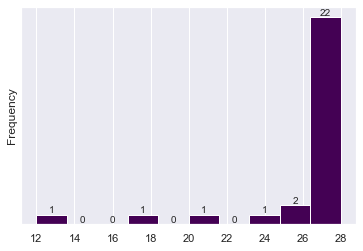

In [20]:
p1 = employ_df2['Region'].value_counts().plot(kind='hist', colormap='viridis')
for p in p1.containers:
    p1.bar_label(p, fmt='%g', label_type='edge')
    
plt.yticks([])

In [21]:
employ_df2['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

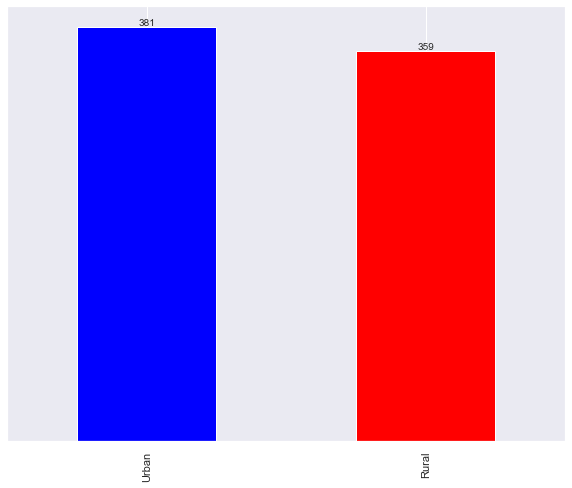

In [22]:
p2=employ_df2['Area'].value_counts().plot(kind='bar', color = {'red', 'blue'}, figsize=(10,8))
for p in p2.containers:
    p2.bar_label(p, fmt='%g', label_type='edge')
    
plt.yticks([]); # removes y labels

### Bivariate Analysis

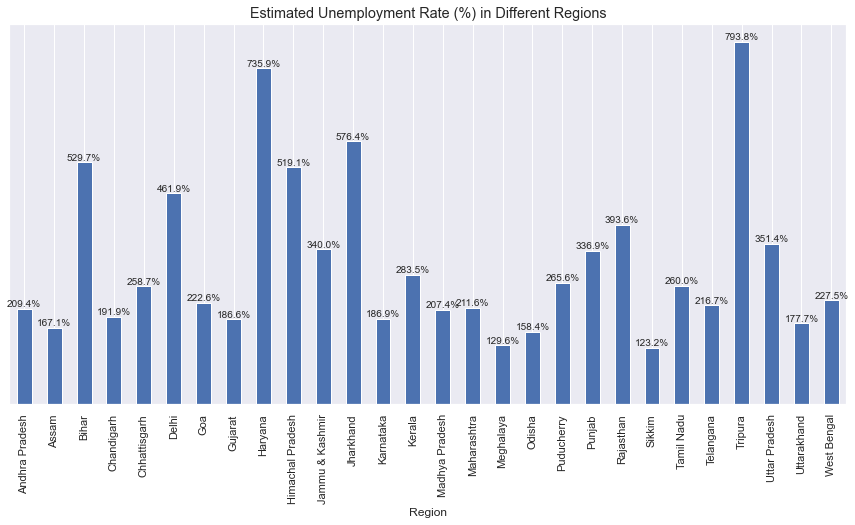

In [23]:
p3 = employ_df2.groupby(['Region'])['Estimated Unemployment Rate (%)'].sum().plot(kind='bar', figsize=(15,7))
for p in p3.containers:
    p3.bar_label(p, fmt='%.1f%%', label_type='edge')
plt.title("Estimated Unemployment Rate (%) in Different Regions", fontsize='x-large');
plt.yticks([]);

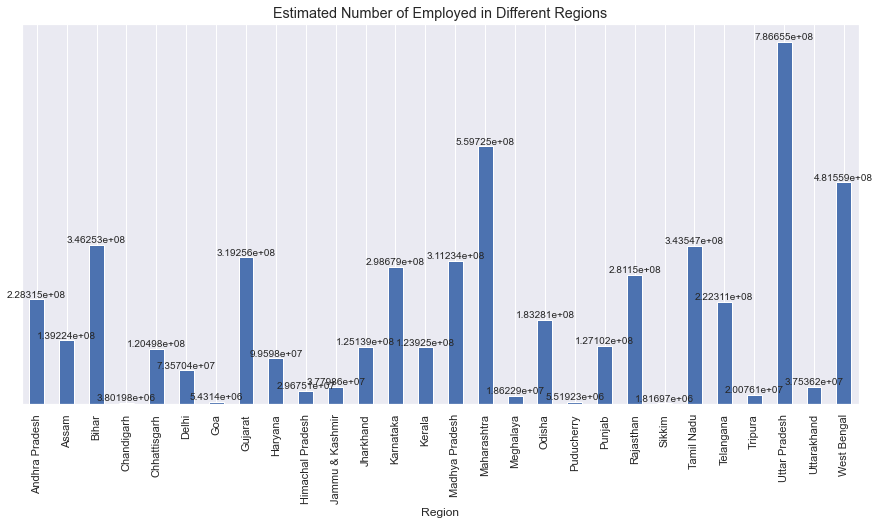

In [24]:
p4 = employ_df2.groupby(['Region'])['Estimated Employed'].sum().plot(kind='bar', figsize=(15,7))
for p in p4.containers:
    p4.bar_label(p, fmt='%g', label_type='edge')
plt.title("Estimated Number of Employed in Different Regions", fontsize='x-large');
plt.yticks([]);

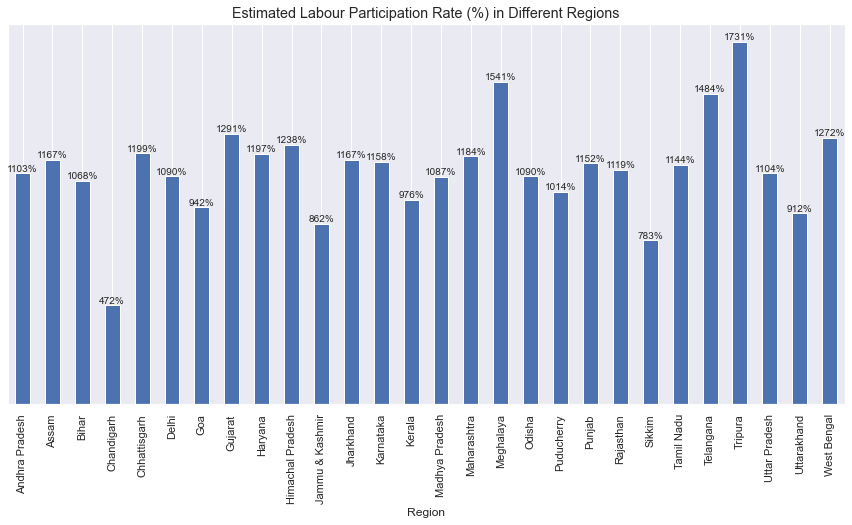

In [25]:
p5 = employ_df2.groupby(['Region'])['Estimated Labour Participation Rate (%)'].sum().plot(kind='bar', figsize=(15, 7))
for p in p5.containers:
    p5.bar_label(p, fmt='%1.f%%', label_type='edge')
plt.title("Estimated Labour Participation Rate (%) in Different Regions", fontsize='x-large');
plt.yticks([]);

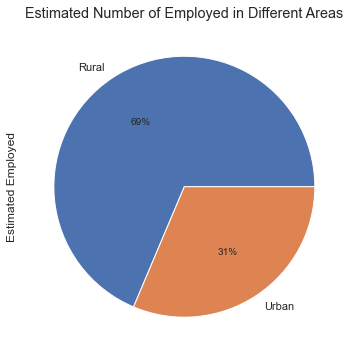

In [26]:
employ_df2.groupby(['Area'])['Estimated Employed'].sum().plot(kind='pie', autopct='%1.f%%', figsize=(10,6)),
plt.title("Estimated Number of Employed in Different Areas", fontsize='x-large');

<p>From the bar plot above, it is obvious more people were employed in the rural area than in the urban area.</p>

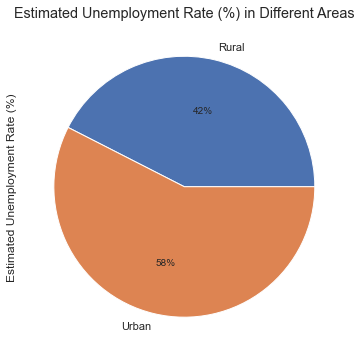

In [27]:
employ_df2.groupby(['Area'])['Estimated Unemployment Rate (%)'].sum().plot(kind='pie', autopct='%1.f%%', figsize=(10,6));
plt.title("Estimated Unemployment Rate (%) in Different Areas", fontsize='x-large');

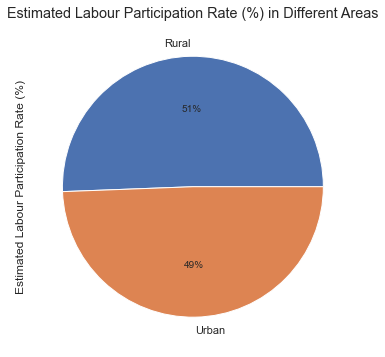

In [28]:
employ_df2.groupby(['Area'])['Estimated Labour Participation Rate (%)'].sum().plot(kind='pie', autopct='%1.f%%', figsize=(10,6));
plt.title("Estimated Labour Participation Rate (%) in Different Areas", fontsize='x-large');

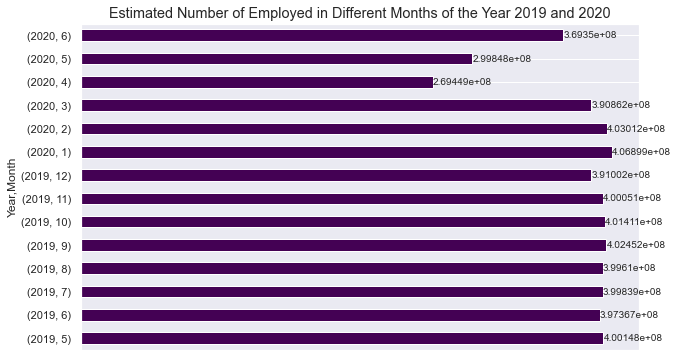

In [29]:
p6=employ_df2.groupby(['Year', 'Month'])['Estimated Employed'].sum().plot(kind='barh', colormap='viridis', figsize=(10,6))
for p in p6.containers:
    p6.bar_label(p, fmt='%g', label_type='edge')
plt.title("Estimated Number of Employed in Different Months of the Year 2019 and 2020", fontsize='x-large');
plt.xticks([]);

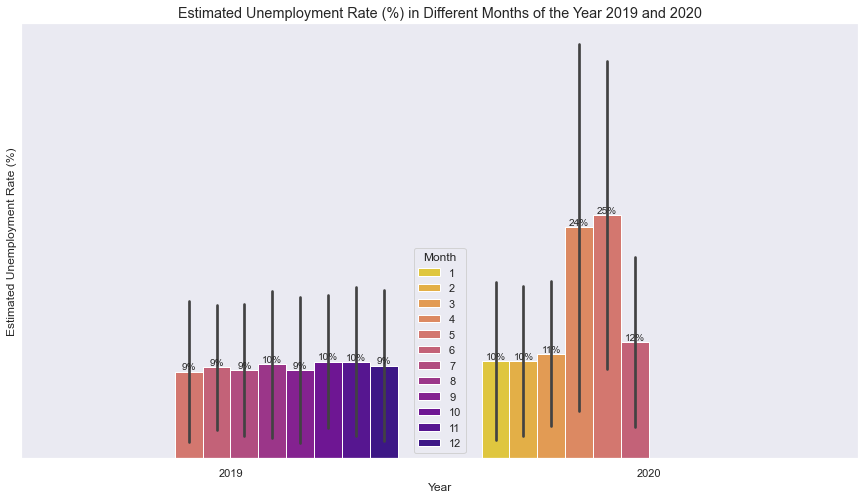

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='Year', y='Estimated Unemployment Rate (%)', hue='Month', data=employ_df2, palette="plasma_r", ci='sd');
ax.set_title('Estimated Unemployment Rate (%) in Different Months of the Year 2019 and 2020', fontsize='x-large')

for p in ax.containers:
    ax.bar_label(p, fmt='%1.f%%', label_type='edge')

plt.yticks([]);

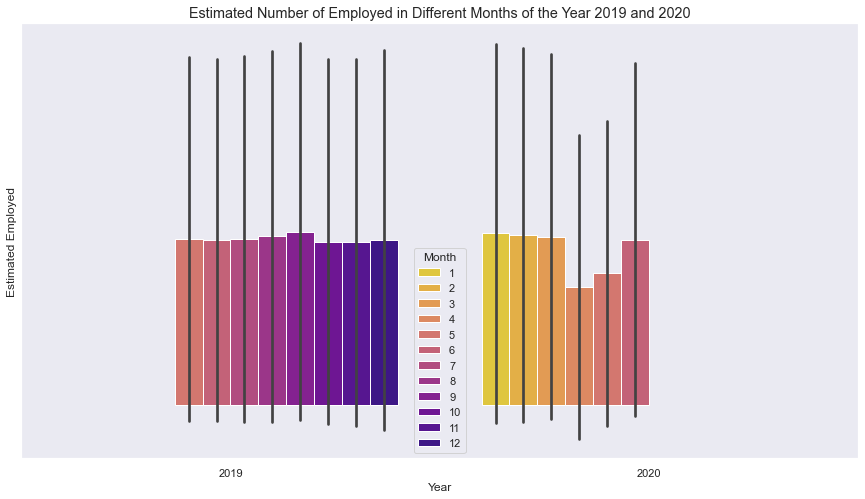

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.barplot(x='Year', y='Estimated Employed', hue='Month', data=employ_df2, palette="plasma_r", ci='sd' );

ax.set_title('Estimated Number of Employed in Different Months of the Year 2019 and 2020', fontsize='x-large');
plt.yticks([]);

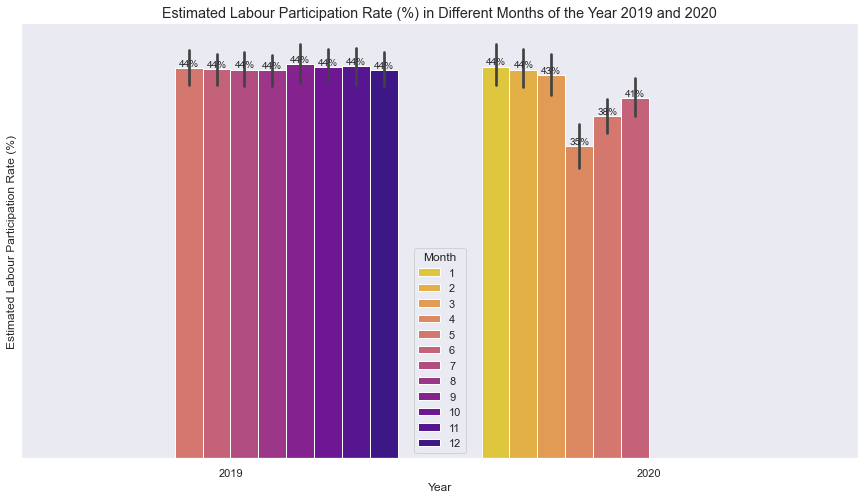

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.barplot(x='Year', y='Estimated Labour Participation Rate (%)', hue='Month', data=employ_df2, palette="plasma_r" );

ax.set_title('Estimated Labour Participation Rate (%) in Different Months of the Year 2019 and 2020', fontsize='x-large');

for p in ax.containers:
    ax.bar_label(p, fmt='%1.f%%', label_type='edge')

plt.yticks([]);

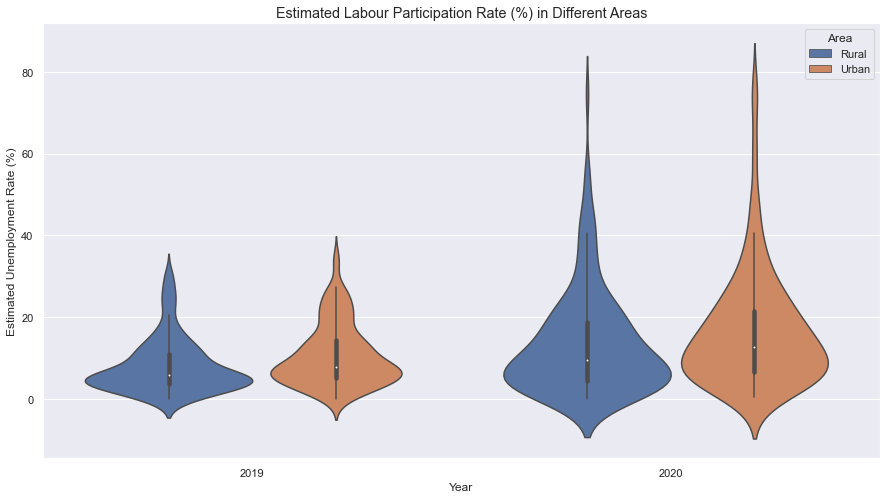

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.violinplot(x='Year', y='Estimated Unemployment Rate (%)', hue='Area', data=employ_df2)

ax.set_title('Estimated Labour Participation Rate (%) in Different Areas', fontsize='x-large');

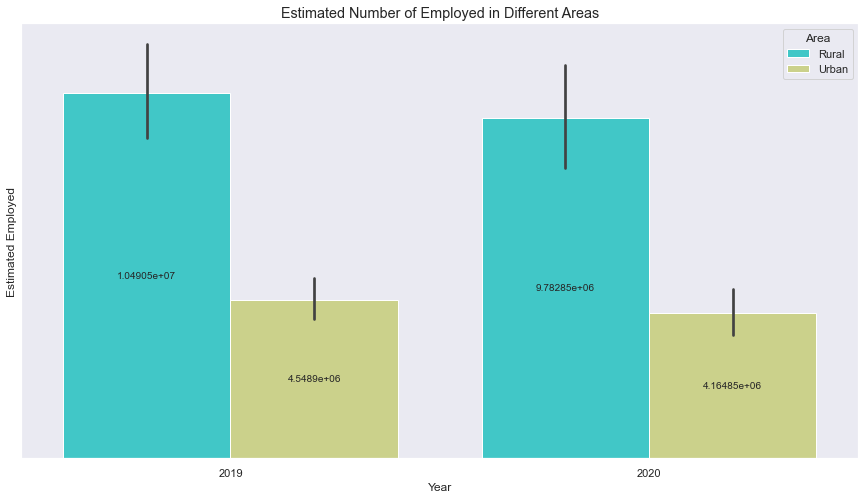

In [34]:
fig, ax = fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.barplot(x='Year', y='Estimated Employed', hue='Area', data=employ_df2, palette='rainbow')

ax.set_title('Estimated Number of Employed in Different Areas', fontsize='x-large');


for p in ax.containers:
    ax.bar_label(p, fmt='%g', label_type='center')
    
plt.yticks([]);

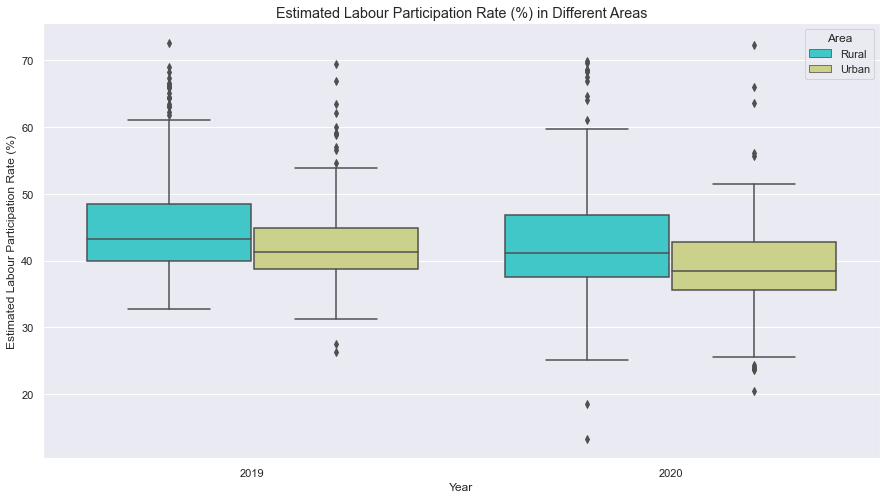

In [35]:
fig, ax = fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.boxplot(x='Year', y='Estimated Labour Participation Rate (%)', hue='Area', data=employ_df2, palette='rainbow')

ax.set_title('Estimated Labour Participation Rate (%) in Different Areas', fontsize='x-large');

### Multivariate Analysis

In [36]:
employ_df2.columns

Index(['Region', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Area', 'Year', 'Month'],
      dtype='object')

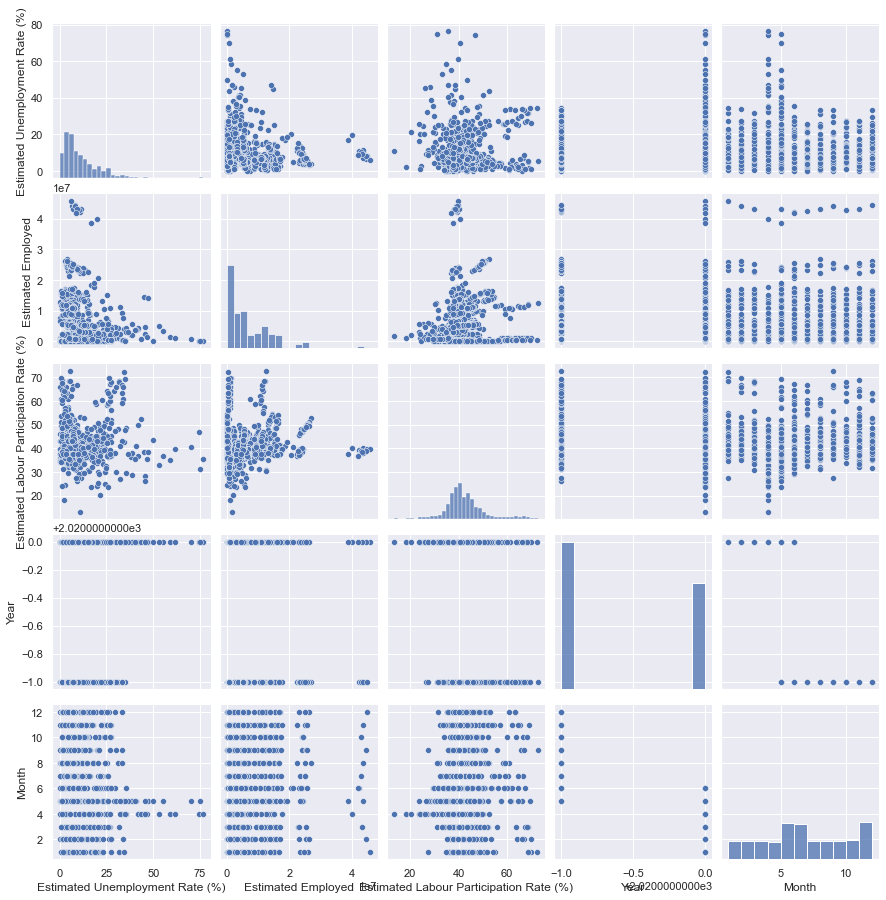

In [37]:
sns.pairplot(employ_df2);

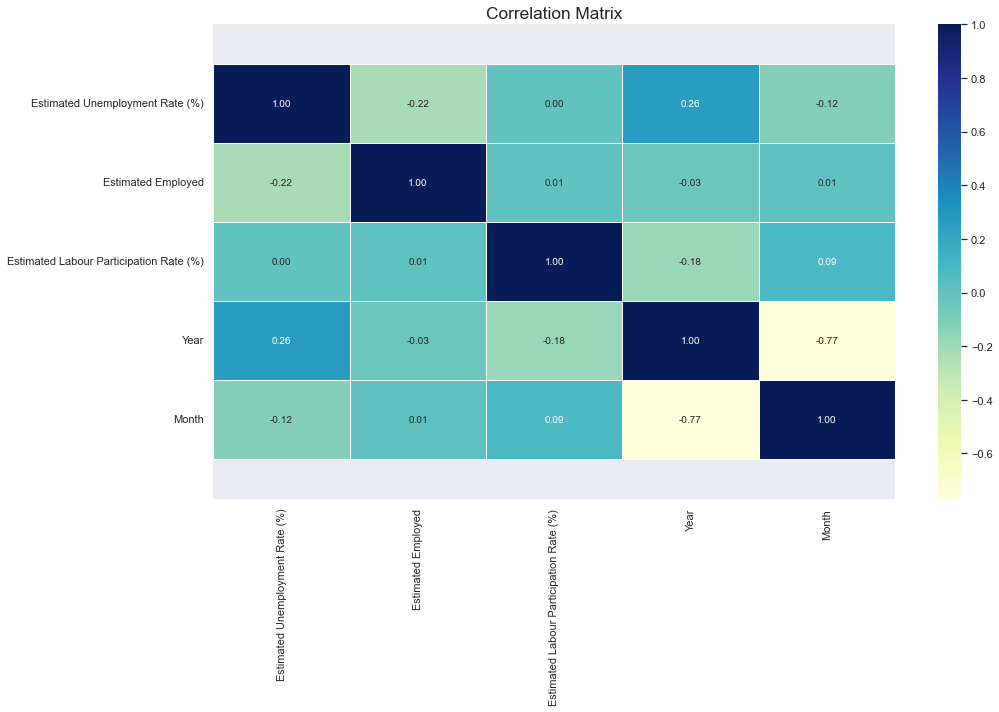

In [38]:
# visualizing the correlation matrix
corr_matrix = employ_df2.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt='.2f', cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix', fontsize='xx-large');
plt.tight_layout()

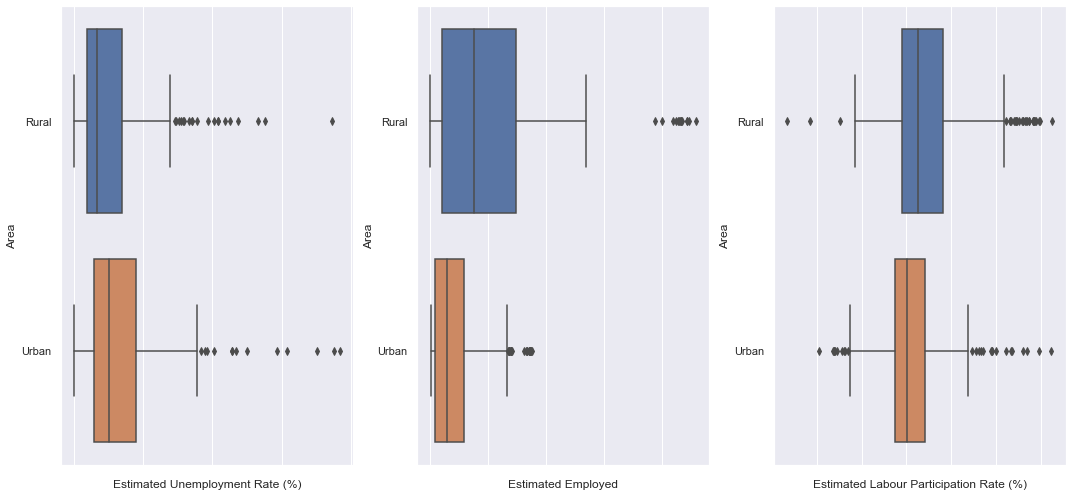

In [39]:
import warnings
warnings.filterwarnings('ignore')

features = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']                  

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
axs = axs.flatten()

# create barplot for each numerical features
for i, var in enumerate(features):
    sns.boxplot(x=var, y='Area', data=employ_df2, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
fig.tight_layout()
plt.show()

### Thank you